In [1]:
#import dependencies
import pandas as pd
import numpy as np
#import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score 
# classification_report_imbalanced   
import matplotlib.mlab as mlab
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import skl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
# Read the CSV file into a Pandas DataFrame
cvd_df=pd.read_csv("Framingham_clean.csv")

# Review the DataFrame
cvd_df.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [3]:

cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex_Male                    3658 non-null   int64  
 1   Age                         3658 non-null   int64  
 2   Education                   3658 non-null   int64  
 3   Current_Smoker              3658 non-null   int64  
 4   Cigarettes_Per_Day          3658 non-null   int64  
 5   Blood_Pressure_Medications  3658 non-null   int64  
 6   Prevalent_Stroke            3658 non-null   int64  
 7   Prevalent_Hypertension      3658 non-null   int64  
 8   Diabetes                    3658 non-null   int64  
 9   Total_Cholesterol           3658 non-null   int64  
 10  Systolic_Blood_Pressure     3658 non-null   float64
 11  Diastolic_Blood_Pressure    3658 non-null   float64
 12  BMI                         3658 non-null   float64
 13  Heart_Rate                  3658 

In [4]:
cvd_df.isnull().sum()

Sex_Male                      0
Age                           0
Education                     0
Current_Smoker                0
Cigarettes_Per_Day            0
Blood_Pressure_Medications    0
Prevalent_Stroke              0
Prevalent_Hypertension        0
Diabetes                      0
Total_Cholesterol             0
Systolic_Blood_Pressure       0
Diastolic_Blood_Pressure      0
BMI                           0
Heart_Rate                    0
Glucose                       0
TenYearCHD                    0
dtype: int64

In [5]:
cvd_df.shape

(3658, 16)

In [6]:
cvd_df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [7]:

cvd_df.describe()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# Defining features set
X = cvd_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Current_Smoker,Cigarettes_Per_Day,Blood_Pressure_Medications,Prevalent_Stroke,Prevalent_Hypertension,Diabetes,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85


In [9]:
# Defining target vector
y = cvd_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [10]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [12]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [13]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the Decision Tree Model

In [14]:
# Creating the decision tree classifier instance
dt_model = tree.DecisionTreeClassifier()

In [15]:
# Fitting the model
dt_model = dt_model.fit(X_train_scaled, y_train)

Making Predictions using the Tree Model

In [16]:
# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

Model Evaluation

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("DT Confusion Matrix")
display(cm_df)
print(f"DT Accuracy Score : {acc_score}")
print("DT Classification Report")
print(classification_report(y_test, predictions))

DT Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,653,122
Actual 1,98,42


DT Accuracy Score : 0.7595628415300546
DT Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       775
           1       0.26      0.30      0.28       140

    accuracy                           0.76       915
   macro avg       0.56      0.57      0.57       915
weighted avg       0.78      0.76      0.77       915



In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

 Fitting the Random Forest Model

In [20]:
# Creating a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Making Predictions using the Random Forest model

In [22]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

Model Evaluation

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("RF Confusion Matrix")
display(cm_df)
print(f"RF Accuracy Score : {acc_score}")
print("RF Classification Report")
print(classification_report(y_test, predictions))

RF Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,769,6
Actual 1,136,4


RF Accuracy Score : 0.8448087431693989
RF Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       775
           1       0.40      0.03      0.05       140

    accuracy                           0.84       915
   macro avg       0.62      0.51      0.48       915
weighted avg       0.78      0.84      0.78       915



In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13339031982652996, 'Systolic_Blood_Pressure'),
 (0.12872809244092706, 'BMI'),
 (0.1281075071286606, 'Age'),
 (0.12223071749935507, 'Total_Cholesterol'),
 (0.12023574141818423, 'Glucose'),
 (0.11916232255516142, 'Diastolic_Blood_Pressure'),
 (0.09483738807752018, 'Heart_Rate'),
 (0.049212468693805106, 'Cigarettes_Per_Day'),
 (0.036432943412911326, 'Education'),
 (0.020878156908295694, 'Sex_Male'),
 (0.01772737060052536, 'Prevalent_Hypertension'),
 (0.012219808876814635, 'Current_Smoker'),
 (0.007709252451526337, 'Blood_Pressure_Medications'),
 (0.007057377916311747, 'Diabetes'),
 (0.002070532193471244, 'Prevalent_Stroke')]

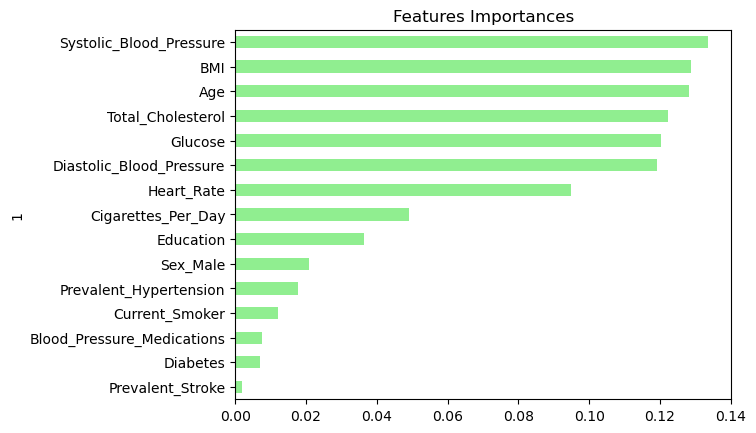

In [26]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
feature_importance = importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

feature_importance.get_figure().savefig('Output/feature_importance_plot.png')


In [27]:
cvd_df.nunique()

Sex_Male                         2
Age                             39
Education                        4
Current_Smoker                   2
Cigarettes_Per_Day              33
Blood_Pressure_Medications       2
Prevalent_Stroke                 2
Prevalent_Hypertension           2
Diabetes                         2
Total_Cholesterol              241
Systolic_Blood_Pressure        231
Diastolic_Blood_Pressure       142
BMI                           1298
Heart_Rate                      72
Glucose                        138
TenYearCHD                       2
dtype: int64

Now that we have the unique value counts for each row, let's look into how those values are distributed within each row and create rare occurences bins we will name 'Other' 

Row 'Age'

In [28]:
# Looking at Age value counts for binning
age_count = cvd_df['Age'].value_counts()
print(age_count.to_string())

40    167
46    166
42    161
48    149
39    147
41    145
44    143
45    140
43    137
52    129
38    124
50    123
51    123
55    123
54    119
49    116
53    116
47    114
57    108
56    105
59    100
60     98
58     97
63     96
62     91
61     91
64     80
37     80
36     77
65     46
67     38
66     34
35     33
68     16
34     14
33      5
69      5
32      1
70      1


In [29]:
# Converting the series to a dataframe in order to make a list of the ages we would like to replace
df1 = age_count.to_frame(name='count').reset_index(names='age')
df1.head()

,age,count
0,40,167
1,46,166
2,42,161
3,48,149
4,39,147


In [30]:
# Creating the list of age_count we would like to replace, choosing 80 as a cutoff value
age_to_replace = []

for i in df1.index:
    if df1.loc[i]['count'] < 80:
        age_to_replace.append(df1.loc[i]['age'])

In [31]:
# Replacing the above in the dataframe
for cls in age_to_replace:
    cvd_df['Age'] = cvd_df['Age'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Age'].value_counts()

Other    270
40       167
46       166
42       161
48       149
39       147
41       145
44       143
45       140
43       137
52       129
38       124
50       123
55       123
51       123
54       119
53       116
49       116
47       114
57       108
56       105
59       100
60        98
58        97
63        96
62        91
61        91
37        80
64        80
Name: Age, dtype: int64

Row 'Cigarettes_Per_Day'

In [32]:
# Looking at cigarettes_per_day value counts for binning
cigarette_count = cvd_df['Cigarettes_Per_Day'].value_counts()
print(cigarette_count.to_string())

0     1869
20     651
30     192
15     184
10     123
5       99
9       99
3       83
40      69
1       61
43      49
25      44
35      19
6       17
2       16
7       11
8        9
60       9
4        8
17       7
18       7
11       5
23       5
50       4
13       3
45       3
12       3
16       3
19       2
38       1
29       1
70       1
14       1


In [33]:
# Converting the series to a dataframe in order to make a list of the cigarettes_per_day we would like to replace
df2 = cigarette_count.to_frame(name='count').reset_index(names='cigarette')

# Creating the list of cigarette_count we would like to replace, choosing 40 as a cutoff value
cigarette_to_replace = []

for i in df2.index:
    if df2.loc[i]['count'] < 40:
        cigarette_to_replace.append(df2.loc[i]['cigarette'])

# Replacing the above in the dataframe
for cls in cigarette_to_replace:
    cvd_df['Cigarettes_Per_Day'] = cvd_df['Cigarettes_Per_Day'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Cigarettes_Per_Day'].value_counts()

0        1869
20        651
30        192
15        184
Other     135
10        123
5          99
9          99
3          83
40         69
1          61
43         49
25         44
Name: Cigarettes_Per_Day, dtype: int64

Row 'Total_Cholesterol'

In [34]:
# Looking at Total_Cholesterol value counts for binning
chol_count = cvd_df['Total_Cholesterol'].value_counts()
print(chol_count.to_string())

240    69
260    58
220    58
232    54
210    51
230    50
250    48
200    48
225    46
205    45
235    44
246    43
195    43
215    41
212    40
270    40
214    39
245    38
229    38
238    37
226    36
190    35
254    35
239    34
234    34
241    34
252    33
258    33
193    32
219    32
266    31
206    31
273    31
185    31
216    31
233    30
253    30
237    30
207    29
248    29
265    29
202    28
222    28
285    28
243    28
275    27
242    27
262    27
213    27
217    27
197    27
261    26
180    26
231    26
227    26
208    25
255    25
280    25
272    24
175    24
218    23
256    23
259    23
211    22
223    22
203    22
201    22
165    22
199    22
274    21
228    21
290    21
224    21
249    20
170    20
186    20
221    20
209    20
271    20
300    20
188    20
279    19
196    19
244    19
194    19
192    19
264    19
204    19
257    18
268    17
247    17
176    17
236    17
267    17
287    17
198    16
310    16
292    16
187    16
281    16


In [35]:
# Converting the series to a dataframe in order to make a list of the total_cholesterol we would like to replace
df3 = chol_count.to_frame(name='count').reset_index(names='chol')

# Creating the list of chol_count we would like to replace, choosing 10 as a cutoff value
chol_to_replace = []

for i in df3.index:
    if df3.loc[i]['count'] < 10:
        chol_to_replace.append(df3.loc[i]['chol'])

# Replacing the above in the dataframe
for cls in chol_to_replace:
    cvd_df['Total_Cholesterol'] = cvd_df['Total_Cholesterol'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Total_Cholesterol'].value_counts()        


Other    364
240       69
220       58
260       58
232       54
        ... 
289       10
183       10
298       10
178       10
182       10
Name: Total_Cholesterol, Length: 135, dtype: int64

Row 'Systolic_Blood_Pressure'

In [36]:
# Looking at Systolic_Blood_Pressure value counts for binning
sbp_count = cvd_df['Systolic_Blood_Pressure'].value_counts()
print(sbp_count.to_string())

130.0    90
120.0    87
110.0    83
125.0    79
115.0    75
124.0    73
122.0    70
128.0    68
116.0    65
132.0    63
126.0    61
123.0    61
135.0    59
119.0    58
129.0    56
114.0    56
118.0    56
127.0    54
131.0    53
112.0    51
111.0    51
121.0    50
134.0    49
133.0    49
141.0    47
140.0    45
108.0    45
145.0    44
138.0    44
113.0    43
150.0    42
127.5    40
142.0    40
146.0    39
105.0    38
137.0    37
112.5    35
148.0    35
139.0    35
144.0    33
117.0    33
117.5    32
155.0    32
109.0    31
136.0    31
107.0    30
102.0    27
122.5    26
158.0    26
106.0    25
160.0    25
143.0    23
154.0    23
100.0    23
107.5    23
136.5    22
165.0    22
132.5    21
147.0    20
159.0    20
149.0    19
101.0    18
104.0    18
137.5    18
131.5    18
153.0    18
103.0    18
152.0    18
126.5    17
170.0    17
151.0    17
118.5    16
142.5    16
164.0    15
147.5    15
121.5    15
156.0    15
157.0    14
113.5    13
146.5    12
163.0    12
166.0    12
120.5    12
133.

In [37]:
# Converting the series to a dataframe in order to make a list of the sys BP we would like to replace
df4 = sbp_count.to_frame(name='count').reset_index(names='sbp')

# Creating the list of sbp_count we would like to replace, choosing 10 as a cutoff value
sbp_to_replace = []

for i in df4.index:
    if df4.loc[i]['count'] < 10:
        sbp_to_replace.append(df4.loc[i]['sbp'])

# Replacing the above in the dataframe
for cls in sbp_to_replace:
    cvd_df['Systolic_Blood_Pressure'] = cvd_df['Systolic_Blood_Pressure'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Systolic_Blood_Pressure'].value_counts()   

Other    488
130.0     90
120.0     87
110.0     83
125.0     79
        ... 
129.5     10
175.0     10
98.0      10
96.0      10
168.0     10
Name: Systolic_Blood_Pressure, Length: 97, dtype: int64

Row 'Diastolic Blood Pressure'

In [38]:
# Looking at Diastolic_Blood_Pressure value counts for binning
dbp_count = cvd_df['Diastolic_Blood_Pressure'].value_counts()
print(dbp_count.to_string())

80.0     217
82.0     138
85.0     119
70.0     114
81.0     114
84.0     104
78.0     104
90.0     103
87.0      97
86.0      95
79.0      94
75.0      92
88.0      91
74.0      89
83.0      82
76.0      81
73.0      80
72.0      77
89.0      69
92.0      69
77.0      63
71.0      62
94.0      61
69.0      51
91.0      50
95.0      50
93.0      46
72.5      45
98.0      43
77.5      41
68.0      41
67.0      40
100.0     39
82.5      37
96.0      34
65.0      34
97.0      33
66.0      32
85.5      32
99.0      27
102.0     27
92.5      26
105.0     26
101.0     23
67.5      23
64.0      22
60.0      22
86.5      22
66.5      20
110.0     19
62.0      19
87.5      19
83.5      18
76.5      17
73.5      17
61.0      16
108.0     15
78.5      13
109.0     13
103.0     13
106.0     13
74.5      13
75.5      12
97.5      12
107.0     12
104.0     11
81.5      11
84.5      11
79.5      10
59.0      10
70.5      10
63.0      10
89.5       9
88.5       9
80.5       9
96.5       8
62.5       8

In [39]:
# Converting the series to a dataframe in order to make a list of the diastolic BP we would like to replace
df5 = dbp_count.to_frame(name='count').reset_index(names='dbp')

# Creating the list of dbp_count we would like to replace, choosing 10 as a cutoff value
dbp_to_replace = []

for i in df5.index:
    if df5.loc[i]['count'] < 10:
        dbp_to_replace.append(df5.loc[i]['dbp'])

# Replacing the above in the dataframe
for cls in dbp_to_replace:
    cvd_df['Diastolic_Blood_Pressure'] = cvd_df['Diastolic_Blood_Pressure'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Diastolic_Blood_Pressure'].value_counts() 

Other    243
80.0     217
82.0     138
85.0     119
70.0     114
        ... 
84.5      11
59.0      10
63.0      10
79.5      10
70.5      10
Name: Diastolic_Blood_Pressure, Length: 73, dtype: int64

Row 'BMI'

In [40]:
# Looking at BMI value counts for binning
bmi_count = cvd_df['BMI'].value_counts()
print(bmi_count.to_string())

23.48    18
22.54    16
22.91    15
25.09    14
22.19    14
23.10    13
25.23    13
23.09    13
22.01    12
27.78    12
22.90    12
22.73    12
24.10    11
25.94    11
27.73    11
23.29    11
26.25    10
22.72    10
25.38    10
21.51    10
26.36    10
24.56    10
28.30    10
22.18     9
25.62     9
24.35     9
25.82     9
26.09     9
24.22     9
21.35     9
23.72     9
28.04     9
26.79     9
29.35     9
21.99     9
27.51     9
22.89     8
23.06     8
23.95     8
24.01     8
25.13     8
26.84     8
23.68     8
26.98     8
24.80     8
26.51     8
26.89     8
22.36     8
22.02     8
26.97     8
27.22     8
23.65     8
23.08     8
23.88     8
26.00     8
22.17     8
25.48     8
24.87     8
24.71     8
24.17     8
24.67     8
28.09     8
27.01     8
25.74     8
26.05     7
21.19     7
24.96     7
28.35     7
27.27     7
28.18     7
23.96     7
27.86     7
21.18     7
25.63     7
20.12     7
20.72     7
25.41     7
26.18     7
24.39     7
22.53     7
24.24     7
26.56     7
26.45     7
25.1

In [41]:
# Converting the series to a dataframe in order to make a list of the sys BMI we would like to replace
df6 = bmi_count.to_frame(name='count').reset_index(names='bmi')

# Creating the list of bmi_count we would like to replace, choosing 2 as a cutoff value
bmi_to_replace = []

for i in df6.index:
    if df6.loc[i]['count'] < 2:
        bmi_to_replace.append(df6.loc[i]['bmi'])

# Replacing the above in the dataframe
for cls in bmi_to_replace:
    cvd_df['BMI'] = cvd_df['BMI'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['BMI'].value_counts() 

Other    527
23.48     18
22.54     16
22.91     15
25.09     14
        ... 
31.76      2
18.55      2
33.19      2
18.84      2
35.19      2
Name: BMI, Length: 772, dtype: int64

Row 'Heart_Rate'

In [42]:
# Looking at HR value counts for binning
hr_count = cvd_df['Heart_Rate'].value_counts()
print(hr_count.to_string())

75     507
80     336
70     269
60     207
85     192
72     184
65     175
90     147
68     121
67      87
63      80
100     79
95      75
66      73
78      70
82      68
88      64
73      60
62      54
76      48
64      47
77      46
69      45
83      45
58      43
92      40
96      33
86      32
55      32
79      30
110     30
71      29
74      26
87      26
84      23
50      21
94      20
56      19
52      16
98      15
57      12
54      11
105     11
81      10
53      10
89       9
93       9
91       7
120      6
102      6
61       5
115      5
108      5
103      4
107      4
59       4
125      3
48       3
104      3
112      2
106      2
45       2
122      2
99       1
101      1
143      1
140      1
97       1
130      1
47       1
44       1
46       1


In [43]:
# Converting the series to a dataframe in order to make a list of the HR we would like to replace
df7 = hr_count.to_frame(name='count').reset_index(names='hr')

# Creating the list of hr_count we would like to replace, choosing 15 as a cutoff value
hr_to_replace = []

for i in df7.index:
    if df7.loc[i]['count'] < 15:
        hr_to_replace.append(df7.loc[i]['hr'])

# Replacing the above in the dataframe
for cls in hr_to_replace:
    cvd_df['Heart_Rate'] = cvd_df['Heart_Rate'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Heart_Rate'].value_counts() 

75       507
80       336
70       269
60       207
85       192
72       184
65       175
90       147
Other    144
68       121
67        87
63        80
100       79
95        75
66        73
78        70
82        68
88        64
73        60
62        54
76        48
64        47
77        46
83        45
69        45
58        43
92        40
96        33
86        32
55        32
79        30
110       30
71        29
74        26
87        26
84        23
50        21
94        20
56        19
52        16
98        15
Name: Heart_Rate, dtype: int64

Row 'Glucose'

In [44]:
# Looking at Glucose value counts for binning
gluc_count = cvd_df['Glucose'].value_counts()
print(gluc_count.to_string())

75     180
77     166
70     150
73     146
83     145
78     139
80     137
74     136
76     121
85     119
87     108
84     104
67     102
72     101
82      91
79      90
68      90
65      83
90      79
71      74
88      72
60      62
69      60
86      59
66      58
63      58
81      57
93      56
100     48
64      44
95      44
62      41
92      36
94      35
97      32
89      29
103     29
91      28
96      27
98      23
61      22
99      20
58      20
57      19
102     18
108     14
107     14
115     14
55      13
104     13
59      11
105     11
113     11
117     10
112      9
118      9
110      9
120      9
106      8
54       5
116      5
56       5
53       5
123      5
137      4
126      4
140      4
45       4
114      4
101      4
127      4
109      3
47       3
50       3
122      3
132      3
124      2
119      2
394      2
52       2
170      2
206      2
136      2
44       2
40       2
111      2
173      2
150      2
121      2
130      2
215      2

In [45]:
# Converting the series to a dataframe in order to make a list of the glucose we would like to replace
df8 = gluc_count.to_frame(name='count').reset_index(names='gluc')

# Creating the list of gluc_count we would like to replace, choosing 5 as a cutoff value
gluc_to_replace = []

for i in df8.index:
    if df8.loc[i]['count'] < 5:
        gluc_to_replace.append(df8.loc[i]['gluc'])

# Replacing the above in the dataframe
for cls in gluc_to_replace:
    cvd_df['Glucose'] = cvd_df['Glucose'].replace(cls,"Other")
    
# Checking to make sure binning was successful
cvd_df['Glucose'].value_counts() 

75     180
77     166
70     150
73     146
83     145
      ... 
54       5
56       5
123      5
53       5
116      5
Name: Glucose, Length: 65, dtype: int64

Dropping the 4 least important features

In [46]:
# Creating a copy of our dataframe
cvd1_df = cvd_df.copy()

cvd1_df.drop(['Prevalent_Stroke','Diabetes', 'Blood_Pressure_Medications', 'Current_Smoker'], axis=1, inplace=True)

In [47]:
# Defining features set
X = cvd1_df.copy()
X.drop("TenYearCHD", axis=1, inplace=True)
X.head()

,Sex_Male,Age,Education,Cigarettes_Per_Day,Prevalent_Hypertension,Total_Cholesterol,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,BMI,Heart_Rate,Glucose
0,1,39,4,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,20,0,245,127.5,80.0,25.34,75,70
3,0,61,3,30,1,225,150.0,95.0,28.58,65,103
4,0,46,3,Other,0,285,130.0,84.0,23.1,85,85


In [48]:
# Encoding the categorical variables using get_dummies
X = pd.get_dummies(X)

In [49]:
# Previewing the data
X.head()

,Sex_Male,Education,Prevalent_Hypertension,Age_37,Age_38,Age_39,Age_40,Age_41,Age_42,Age_43,...,Glucose_110,Glucose_112,Glucose_113,Glucose_115,Glucose_116,Glucose_117,Glucose_118,Glucose_120,Glucose_123,Glucose_Other
0,1,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Defining target vector
y = cvd1_df["TenYearCHD"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [51]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
# Creating the StandardScaler instance
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scaling the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Fitting the KNeighbors Model

In [53]:
# Instantiating the model with k = 3 neighbors
kn_model = KNeighborsClassifier(n_neighbors=3)

In [54]:
# Training the model
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

Making Predictions using the KN model

In [56]:
# Creating predictions
y_pred = kn_model.predict(X_test_scaled)

# Reviewing the predictions
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [57]:
# Printing the confusion matrix
confusion_matrix(y_pred,y_test)

array([[735, 133],
       [ 40,   7]], dtype=int64)

In [58]:
# Printing the classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       868
           1       0.05      0.15      0.07        47

    accuracy                           0.81       915
   macro avg       0.50      0.50      0.48       915
weighted avg       0.90      0.81      0.85       915

